# 주제 : 프로그래밍 언어별 출판되는 책을 통해 인기있는 언어 찾기

---

## 1. 데이터 준비

### 1-1. 필요한 모듈 불러오기

In [ ]:
import os
import sys
import urllib.request
import json 
import pandas as pd

### 1-2. Naver Books API 호출을 통한 정보 수집 

In [ ]:
client_id = "uAbavg012XaXAEn8gVKz"
client_secret = "lMjPL4LlAk"

In [ ]:
# 검색 URL 생성 함수
def gen_search_url(api_node, search_text, start_num, disp_num):
    base = "https://openapi.naver.com/v1/search"
    node = "/" + api_node + ".json"
    param_query = "?query=" + urllib.parse.quote(search_text)
    param_start = "&start=" + str(start_num)
    param_disp = "&display=" + str(disp_num)
    
    return base + node + param_query + param_start + param_disp

In [ ]:
# 검색 결과 수집 함수
def get_result_onpage(url):
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id", client_id)
    request.add_header("X-Naver-Client-Secret", client_secret)
    response = urllib.request.urlopen(request)

    return json.loads(response.read().decode("utf-8"))

### 1-3. 데이터 정제 및 데이터프레임 구성

In [ ]:
# b태그 제거 함수
def delete_tag(input_str):
    input_str = input_str.replace("<b>", "")
    input_str = input_str.replace("</b>", "")
    
    return input_str

In [ ]:
# 판다스 데이터프레임 변환 함수
def get_fields(json_data):
    title = [delete_tag(each["title"]) for each in json_data["items"]]
    author = [delete_tag(each["author"]) for each in json_data["items"]]
    publisher = [delete_tag(each["publisher"]) for each in json_data["items"]]
    pubdate = [each["pubdate"] for each in json_data["items"]]
    isbn = [each["isbn"] for each in json_data["items"]]
    
    result_pd = pd.DataFrame({
        "제목":title,
        "저자":author,
        "출판사":publisher,
        "출판일": pubdate,
        "ISBN":isbn
    }, columns=["제목", "저자", "출판사", "출판일", "ISBN"])
    
    return result_pd

In [ ]:
df = pd.DataFrame({
    "제목": [],
    "저자": [],
    "출판사": [],
    "출판일": [],
    "ISBN": [],
    "언어":[]
})

In [ ]:
# 데이터셋 구성 함수
def make_dataset(language):
    url = gen_search_url("book", language, 1, 20)
    one_result = get_result_onpage(url)
    result = get_fields(one_result)
    result["언어"] = language
    
    return result

In [ ]:
arr = ['파이썬','Python','C언어','Java','C++','C#','Visual Basic','자바스크립트','SQL','PHP','R프로그래밍']

for name in arr:
    tmp = make_dataset(name)
    df = pd.concat([df, tmp])

In [ ]:
df.head()

,제목,저자,출판사,출판일,ISBN,언어
0,이것이 취업을 위한 코딩 테스트다 with 파이썬 (취업과 이직을 결정하는 알고리즘...,나동빈,한빛미디어,20200805,1162243074 9791162243077,파이썬
1,Do it! 점프 투 파이썬,박응용,이지스퍼블리싱,20190620,1163030910 9791163030911,파이썬
2,혼자 공부하는 파이썬 (파이썬 최신 버전 반영),윤인성,한빛미디어,20190610,1162241888 9791162241882,파이썬
3,파이썬 알고리즘 인터뷰 (95가지 알고리즘 문제 풀이로 완성하는 코딩 테스트),박상길,책만,20200715,1189909170 9791189909178,파이썬
4,"파이썬 증권 데이터 분석 (파이썬 입문, 웹 스크레이핑, 트레이딩 전략, 자동 매매)",김황후,한빛미디어,20200701,1162243201 9791162243206,파이썬


In [ ]:
df.tail()

,제목,저자,출판사,출판일,ISBN,언어
15,빅데이터 통계 분석을 위한 R 프로그래밍 레퍼런스 북,이시다 모토히로,교학사,20180120,8909202882 9788909202886,R프로그래밍
16,R 프로그래밍 (예제로 배우는),유충현,자유아카데미,20101101,8973388525 9788973388523,R프로그래밍
17,R 프로그래밍 및 그래픽스 실습,손영숙|전성현,자유아카데미,20180831,1158082002 9791158082000,R프로그래밍
18,R 프로그래밍 기초 & 활용 (데이터 분석과 통계 프로그래밍을 위한),래리 페이스,길벗,20130204,8966185231 9788966185238,R프로그래밍
19,R을 이용한 빅데이터 분석 및 활용 Part 1. R 프로그래밍과 데이터 시각화,허진경,퍼플,20171024,0000291986 1400000291986,R프로그래밍


In [ ]:
df["언어"].unique()

array(['파이썬', 'Python', 'C언어', 'Java', 'C++', 'C#', 'Visual Basic',
       '자바스크립트', 'SQL', 'PHP', 'R프로그래밍'], dtype=object)

In [ ]:
df.loc[df["언어"] == "파이썬", "언어"] = "Python"
df.loc[df["언어"] == "C언어", "언어"] = "C"
df.loc[df["언어"] == "자바스크립트", "언어"] = "JavaScript"
df.loc[df["언어"] == "R프로그래밍", "언어"] = "R"

In [ ]:
df.head()

,제목,저자,출판사,출판일,ISBN,언어
0,이것이 취업을 위한 코딩 테스트다 with 파이썬 (취업과 이직을 결정하는 알고리즘...,나동빈,한빛미디어,20200805,1162243074 9791162243077,Python
1,Do it! 점프 투 파이썬,박응용,이지스퍼블리싱,20190620,1163030910 9791163030911,Python
2,혼자 공부하는 파이썬 (파이썬 최신 버전 반영),윤인성,한빛미디어,20190610,1162241888 9791162241882,Python
3,파이썬 알고리즘 인터뷰 (95가지 알고리즘 문제 풀이로 완성하는 코딩 테스트),박상길,책만,20200715,1189909170 9791189909178,Python
4,"파이썬 증권 데이터 분석 (파이썬 입문, 웹 스크레이핑, 트레이딩 전략, 자동 매매)",김황후,한빛미디어,20200701,1162243201 9791162243206,Python


In [ ]:
df["언어"].unique()

array(['Python', 'C', 'Java', 'C++', 'C#', 'Visual Basic', 'JavaScript',
       'SQL', 'PHP', 'R'], dtype=object)

In [ ]:
df = df.reset_index(drop=True)
df

,제목,저자,출판사,출판일,ISBN,언어
0,이것이 취업을 위한 코딩 테스트다 with 파이썬 (취업과 이직을 결정하는 알고리즘...,나동빈,한빛미디어,20200805,1162243074 9791162243077,Python
1,Do it! 점프 투 파이썬,박응용,이지스퍼블리싱,20190620,1163030910 9791163030911,Python
2,혼자 공부하는 파이썬 (파이썬 최신 버전 반영),윤인성,한빛미디어,20190610,1162241888 9791162241882,Python
3,파이썬 알고리즘 인터뷰 (95가지 알고리즘 문제 풀이로 완성하는 코딩 테스트),박상길,책만,20200715,1189909170 9791189909178,Python
4,"파이썬 증권 데이터 분석 (파이썬 입문, 웹 스크레이핑, 트레이딩 전략, 자동 매매)",김황후,한빛미디어,20200701,1162243201 9791162243206,Python
...,...,...,...,...,...,...
215,빅데이터 통계 분석을 위한 R 프로그래밍 레퍼런스 북,이시다 모토히로,교학사,20180120,8909202882 9788909202886,R
216,R 프로그래밍 (예제로 배우는),유충현,자유아카데미,20101101,8973388525 9788973388523,R
217,R 프로그래밍 및 그래픽스 실습,손영숙|전성현,자유아카데미,20180831,1158082002 9791158082000,R
218,R 프로그래밍 기초 & 활용 (데이터 분석과 통계 프로그래밍을 위한),래리 페이스,길벗,20130204,8966185231 9788966185238,R


###  1-4. 중복 데이터 제거

In [ ]:
len(df["ISBN"].unique())

217

In [ ]:
df.drop_duplicates(subset='ISBN', keep='first', inplace=True, ignore_index=False)

In [ ]:
df = df.reset_index(drop=True)
df

,제목,저자,출판사,출판일,ISBN,언어
0,이것이 취업을 위한 코딩 테스트다 with 파이썬 (취업과 이직을 결정하는 알고리즘...,나동빈,한빛미디어,20200805,1162243074 9791162243077,Python
1,Do it! 점프 투 파이썬,박응용,이지스퍼블리싱,20190620,1163030910 9791163030911,Python
2,혼자 공부하는 파이썬 (파이썬 최신 버전 반영),윤인성,한빛미디어,20190610,1162241888 9791162241882,Python
3,파이썬 알고리즘 인터뷰 (95가지 알고리즘 문제 풀이로 완성하는 코딩 테스트),박상길,책만,20200715,1189909170 9791189909178,Python
4,"파이썬 증권 데이터 분석 (파이썬 입문, 웹 스크레이핑, 트레이딩 전략, 자동 매매)",김황후,한빛미디어,20200701,1162243201 9791162243206,Python
...,...,...,...,...,...,...
212,빅데이터 통계 분석을 위한 R 프로그래밍 레퍼런스 북,이시다 모토히로,교학사,20180120,8909202882 9788909202886,R
213,R 프로그래밍 (예제로 배우는),유충현,자유아카데미,20101101,8973388525 9788973388523,R
214,R 프로그래밍 및 그래픽스 실습,손영숙|전성현,자유아카데미,20180831,1158082002 9791158082000,R
215,R 프로그래밍 기초 & 활용 (데이터 분석과 통계 프로그래밍을 위한),래리 페이스,길벗,20130204,8966185231 9788966185238,R


## 2. 데이터 시각화

In [ ]:
language = ['파이썬', 'C언어', 'Java', 'C++', 'C#', 'Visual Basic','자바스크립트', 'SQL', 'PHP', 'R프로그래밍']
book_category = ['Python', 'C', 'Java', 'C++', 'C#', 'Visual Basic','JavaScript', 'SQL', 'PHP', 'R']
book_count = []

def count_books(language):
    url = gen_search_url("book", language, 1, 20)
    one_result = get_result_onpage(url)
    book_count.append(one_result["total"])

for name in language:
    count_books(name)
    
book_count

[1381, 15974, 16541, 7906, 3519, 8433, 2020, 10352, 17819, 576]

In [ ]:
df_book_count = pd.DataFrame(list(zip(book_category,book_count)), columns = ['언어','출판물 수'])
df_book_count

,언어,출판물 수
0,Python,1381
1,C,15974
2,Java,16541
3,C++,7906
4,C#,3519
5,Visual Basic,8433
6,JavaScript,2020
7,SQL,10352
8,PHP,17819
9,R,576


### 2-1. 각 언어별 출판물 순위

In [ ]:
df_book_sorted = df_book_count.sort_values('출판물 수', ascending=False).copy()
df_book_sorted = df_book_sorted.reset_index(drop=True)
df_book_sorted.index = df_book_sorted.index+1
df_book_sorted

,언어,출판물 수
1,PHP,17819
2,Java,16541
3,C,15974
4,SQL,10352
5,Visual Basic,8433
6,C++,7906
7,C#,3519
8,JavaScript,2020
9,Python,1381
10,R,576


### 2-2. 출판물 순위 시각화

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', family="Arial Unicode MS")
get_ipython().run_line_magic('matplotlib', 'inline')

<AxesSubplot:xlabel='언어', ylabel='출판물 수'>

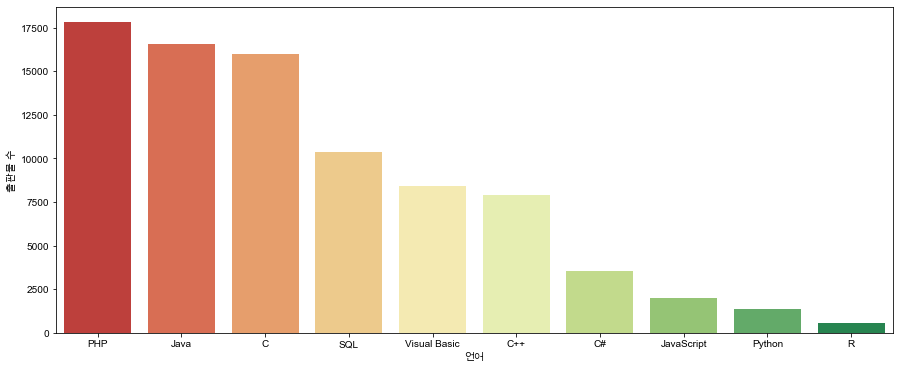

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(data=df_book_sorted, x='언어', y='출판물 수', palette="RdYlGn")

In [ ]:
df.head()

,제목,저자,출판사,출판일,ISBN,언어
0,이것이 취업을 위한 코딩 테스트다 with 파이썬 (취업과 이직을 결정하는 알고리즘...,나동빈,한빛미디어,20200805,1162243074 9791162243077,Python
1,Do it! 점프 투 파이썬,박응용,이지스퍼블리싱,20190620,1163030910 9791163030911,Python
2,혼자 공부하는 파이썬 (파이썬 최신 버전 반영),윤인성,한빛미디어,20190610,1162241888 9791162241882,Python
3,파이썬 알고리즘 인터뷰 (95가지 알고리즘 문제 풀이로 완성하는 코딩 테스트),박상길,책만,20200715,1189909170 9791189909178,Python
4,"파이썬 증권 데이터 분석 (파이썬 입문, 웹 스크레이핑, 트레이딩 전략, 자동 매매)",김황후,한빛미디어,20200701,1162243201 9791162243206,Python


### 2-3. 우리나라의 컴퓨터 언어 관련 출판사 순위 확인

In [ ]:
df['출판사'].unique()

array(['한빛미디어', '이지스퍼블리싱', '책만', '위키북스', '앤써북', '파이스탁', '길벗', '한빛아카데미',
       '비제이퍼블릭', '정보문화사', 'PragmaticBookshelf', '인피니티북스', "O'ReillyMedia",
       '영진닷컴', '제이펍', '자유아카데미', '청람', '생능출판사', 'PacktPublishingLimited',
       'Springer', 'Apress', 'BOOKK(부크크)', '경문사', '성안당', '서현사', '생능출판',
       '아이생각(디지털북스)', '복두출판사', '삼양미디어', '부산대학교출판부', '도우출판', '광문각',
       '한빛아카데미(교재)', '인사이트', '오렌지미디어', '이한미디어', 'ForDummies', 'タック',
       '프로텍미디어', '에이콘출판', '한국방송통신대학교출판문화원', '투에이치앤에스', '북스홀릭퍼블리싱', '책밥상',
       'WroxPress', '혜지원', '황소걸음아카데미', '가메', 'Wiley-IEEEPress', '교학사',
       '이한출판사', '사이버출판사', '지코사이언스', '인터비젼', '기한재', '삼각형',
       'JohnWiley&Sons', '중앙교육진흥연구소', '다락원', '달무리', '영진.com(영진닷컴)',
       '한국데이터산업진흥원', '한국데이터진흥원', '디비안(DBian)', '책밥', 'PHP硏究所',
       'Sitepoint', '남가람북스', '부산대학교출판문화원', '느린생각', '내하출판사', '퍼플'],
      dtype=object)

In [ ]:
len(df['출판사'].unique())

72

In [ ]:
df['출판사'].value_counts().head(10)

한빛미디어      29
길벗         15
위키북스       13
PHP硏究所     11
생능출판사      11
인피니티북스      9
이지스퍼블리싱     9
인사이트        7
에이콘출판       6
한빛아카데미      5
Name: 출판사, dtype: int64

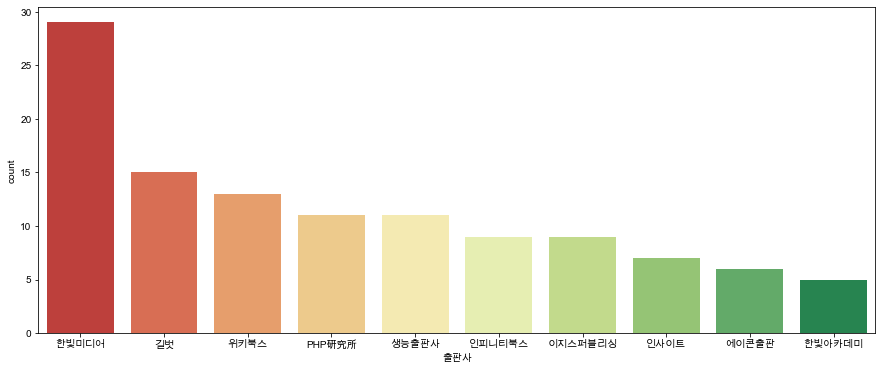

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(
    x=df["출판사"], 
    data=df,
    palette="RdYlGn",
    order=df["출판사"].value_counts().head(10).index
)
plt.show()

### 2-4.  2020년-2021년 데이터와 2017-2019년 데이터 비교

In [ ]:
# 데이터 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제목      217 non-null    object
 1   저자      217 non-null    object
 2   출판사     217 non-null    object
 3   출판일     217 non-null    object
 4   ISBN    217 non-null    object
 5   언어      217 non-null    object
dtypes: object(6)
memory usage: 10.3+ KB


In [ ]:
# 이상치 수정
df.loc[df['출판일'] == '20211000', '출판일'] = '20210909'

In [ ]:
# 데이터 타입을 문자열 => 날짜 타입으로 변경
df['출판일'] = pd.to_datetime(df['출판일'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   제목      217 non-null    object        
 1   저자      217 non-null    object        
 2   출판사     217 non-null    object        
 3   출판일     217 non-null    datetime64[ns]
 4   ISBN    217 non-null    object        
 5   언어      217 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 10.3+ KB


In [ ]:
df.head()

,제목,저자,출판사,출판일,ISBN,언어
0,이것이 취업을 위한 코딩 테스트다 with 파이썬 (취업과 이직을 결정하는 알고리즘...,나동빈,한빛미디어,2020-08-05,1162243074 9791162243077,Python
1,Do it! 점프 투 파이썬,박응용,이지스퍼블리싱,2019-06-20,1163030910 9791163030911,Python
2,혼자 공부하는 파이썬 (파이썬 최신 버전 반영),윤인성,한빛미디어,2019-06-10,1162241888 9791162241882,Python
3,파이썬 알고리즘 인터뷰 (95가지 알고리즘 문제 풀이로 완성하는 코딩 테스트),박상길,책만,2020-07-15,1189909170 9791189909178,Python
4,"파이썬 증권 데이터 분석 (파이썬 입문, 웹 스크레이핑, 트레이딩 전략, 자동 매매)",김황후,한빛미디어,2020-07-01,1162243201 9791162243206,Python


In [ ]:
df[df['출판일'] >= '2020-01-01']

,제목,저자,출판사,출판일,ISBN,언어
0,이것이 취업을 위한 코딩 테스트다 with 파이썬 (취업과 이직을 결정하는 알고리즘...,나동빈,한빛미디어,2020-08-05,1162243074 9791162243077,Python
3,파이썬 알고리즘 인터뷰 (95가지 알고리즘 문제 풀이로 완성하는 코딩 테스트),박상길,책만,2020-07-15,1189909170 9791189909178,Python
4,"파이썬 증권 데이터 분석 (파이썬 입문, 웹 스크레이핑, 트레이딩 전략, 자동 매매)",김황후,한빛미디어,2020-07-01,1162243201 9791162243206,Python
5,파이썬 머신러닝 완벽 가이드 (다양한 캐글 예제와 함께 기초 알고리즘부터 최신 기법...,권철민,위키북스,2020-02-07,1158391927 9791158391928,Python
6,한 권으로 끝내는 파이썬 인공지능 입문 + 실전 종합편 (파이썬+넘파이+텐서플로우로...,서민우,앤써북,2021-09-25,118555386X 9791185553863,Python
...,...,...,...,...,...,...
198,빅 데이터 분석을 위한 R 프로그래밍,김진성,가메,2020-06-16,8980783078 9788980783076,R
199,빅데이터 분석 R프로그래밍으로 시작하기,김민지|임호진,성안당,2021-01-22,8931556780 9788931556780,R
203,"안드로이드 프로그래밍 (Android Studio를 활용한,Android 11.0 ...",우재남|박길식,한빛아카데미,2021-01-07,1156645247 9791156645245,R
204,R언어 프로그래밍 (컴퓨터 비정공자를 위한 빅데이터 활용의 시작),박성호|문경희|양자영|이윤정|조미숙,부산대학교출판문화원,2021-08-31,8973167197 9788973167197,R


#### 2020-2021년 프로그래밍 언어별 출판물 데이터 시각화

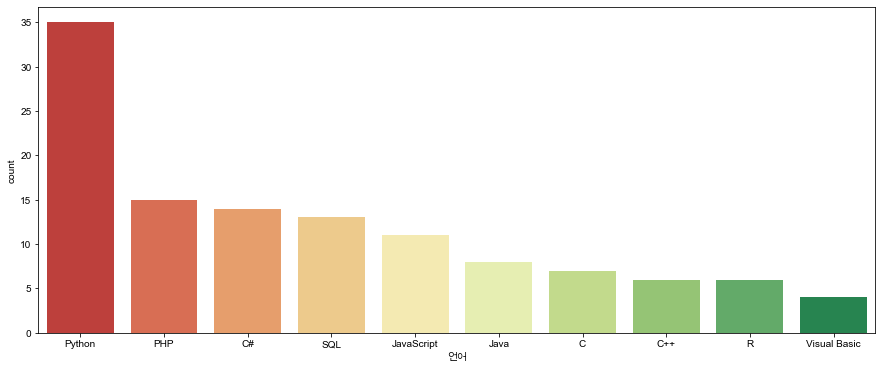

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(
    x=df[df['출판일'] >= '2020-01-01']['언어'], 
    data=df,
    palette="RdYlGn",
    order=df[df['출판일'] >= '2020-01-01']['언어'].value_counts().index
)
plt.show()

In [ ]:
df[(df['출판일'] >= '2017-01-01') & (df['출판일'] <= '2019-12-31')]

,제목,저자,출판사,출판일,ISBN,언어
1,Do it! 점프 투 파이썬,박응용,이지스퍼블리싱,2019-06-20,1163030910 9791163030911,Python
2,혼자 공부하는 파이썬 (파이썬 최신 버전 반영),윤인성,한빛미디어,2019-06-10,1162241888 9791162241882,Python
10,모두의 파이썬 (20일 만에 배우는 프로그래밍 기초),이승찬,길벗,2018-10-09,1160505853 9791160505856,Python
17,모두의 데이터 분석 with 파이썬 (실생활 예제로 시작하는 데이터 분석 첫걸음),송석리|이현아,길벗,2019-04-25,1160507813 9791160507812,Python
39,쉽게 풀어쓴 C언어 Express (Visual Studio 2017),천인국,생능출판사,2018-08-20,8970509577 9788970509570,C
42,Do it! C언어 입문,김성엽,이지스퍼블리싱,2017-01-10,1187370703 9791187370703,C
43,모두의 C언어 (스스로 생각하면서 배우는 C프로그래밍 기초),이형우,길벗,2019-08-02,1160508550 9791160508550,C
44,알쏭달쏭 C언어 180제 (텍스트 출력부터 파일 처리까지 하나씩 만들어보는 C언어 ...,시바타 보요|유리 가오루,한빛미디어,2019-12-01,1162242434 9791162242438,C
48,혼자 공부하는 C 언어,서현우,한빛미디어,2019-06-10,1162241861 9791162241868,C
52,C 언어 for Beginner (쉽게 배워 제대로 만드는 C 프로그램),우재남,한빛아카데미,2018-06-30,1156643953 9791156643951,C


#### 2017-2019년 프로그래밍 언어별 출판물수 시각화 

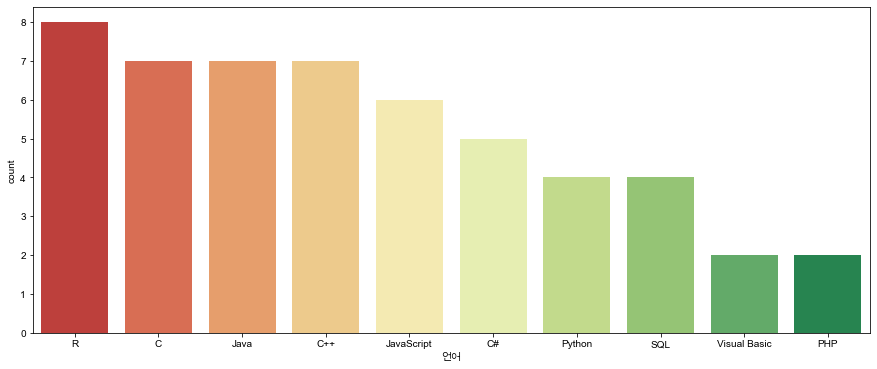

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(
    x=df[(df['출판일'] >= '2017-01-01') & (df['출판일'] <= '2019-12-31')]['언어'], 
    data=df,
    palette="RdYlGn",
    order=df[(df['출판일'] >= '2017-01-01') & (df['출판일'] <= '2019-12-31')]['언어'].value_counts().index
)
plt.show()

## 3. 정리 및 결론

- 분석 데이터는 각 언어별 상위 20권의 책을 기준으로 Naver 책 검색 API를 통해 수집하였습니다.
- 수집 대상 데이터를 각 언어별 상위 20권으로 제한한 것은, 검색 결과의 첫 페이지에 나타나는 20권의 책이 사람들이 실질적으로 구매할만한 도서 후보군이라고 판단했기 때문입니다.
- 컴퓨터 프로그래밍 언어별 출판물 수는 PHP, Java, C언어 순으로 많았습니다.
- 출판물 양을 기준으로 한 우리나라의 컴퓨터 언어 관련 출판사 순위는 한빛미디어, 길벗, 위키북스 순으로 나타났습니다.
- 전체 데이터를 2020년을 기준으로 분류했을 때, 2020-2021년 사이에 출판물이 많았던 언어는 파이썬, PHP, C#이었습니다. 
- 2017년부터 2019년 사이에 많이 출판된 프로그래밍 언어가 R, C언어, Java였던 것을 고려하면 최근 2년 사이에 인기있는 프로그래밍 언어 순위에 커다란 변화가 있었음을 알 수 있습니다.

| 언어   | 2017-2019년 순위    | 2020-2021년 순위 |
|------ |-------------------| ----------------|
| Python| 7위                | 1위 |
| C     | 2위                | 7위 |
| Java  | 3위                | 6위 |
| C++   | 4위                | 8위 |
| C#    | 6위                | 3위 |
| Visual Basic  | 9위        | 10위 |
| JavaScript  | 5위          | 5위 |
| SQL   | 8위                | 4위 |
| PHP   | 10위               | 2위 |
| R     | 1위                | 9위 |

- 특히 7위였던 파이썬이 1위로 올라서고, 10위였던 PHP가 2위로 급상승한 것이 가장 눈에 띄는 변화입니다.
- 기존에 1위였던 R이 최근 9위로 떨어지고, 2위였던 C언어가 7위로 추락한 것도 주목할만한 부분입니다.
- 비교적 배우기 어려운 C언어의 인기가 줄어든 것은 이해할만한 부분이지만, 데이터사이언스 분야의 대표적인 프로그래밍 언어인 R의 순위가 크게 떨어진 요인은 현재 데이터에서 추론하기 어렵습니다.
<br>
- 전체적인 출판물 수가 대폭 늘어난 것도 커다란 변화였습니다.
- 2017-2019년 순위에서 1등이었던 R의 출판물 수가 8건에 불과했던 반면, 2020-2021년 순위에서 1등인 파이썬의 경우 출판물 수가 35건에 달합니다.
- 2020-2021년 사이에는 5등 이상의 프로그래밍 언어 출판물이 모두 10건 이상인 것을 통해 추론했을 때, 출판 시장에 프로그래밍 언어 관련 책에 대한 수요가 그 만큼 늘어났다는 것을 알 수 있습니다.